In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

### Description
We have dataset **hacide_train.csv and hacide_test.csv**. This dataset is used to predict a pattern is rare or not
### Requirement
1. Read dataset **hacide_train.csv and hacide_test.csv**. Check the balance of each target class, visualize them and give a review.
2. If these class are imbalance, choose the method to balance them and visualize them after. 

In [2]:
dataset = pd.read_csv("data/hacide_train.csv", index_col=0)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 3 columns):
cls    1000 non-null int64
x1     1000 non-null float64
x2     1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


In [4]:
dataset.head()

,cls,x1,x2
1,0,0.200798,0.678038
2,0,0.016620,1.576558
3,0,0.228725,-0.559534
4,0,0.126379,-0.093814
5,0,0.600821,-0.298395


In [5]:
dataset.cls.unique()

array([0, 1])

In [6]:
class_count = dataset.cls.value_counts()

In [7]:
class_count

0    980
1     20
Name: cls, dtype: int64

In [8]:
class_percent = class_count / dataset.shape[0]

In [9]:
class_percent

0    0.98
1    0.02
Name: cls, dtype: float64

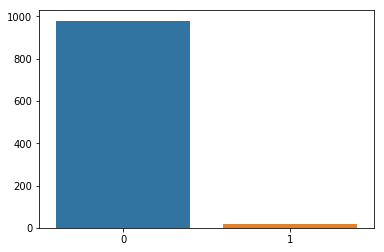

In [10]:
sb.barplot(x = class_count.index, y = class_count.values)

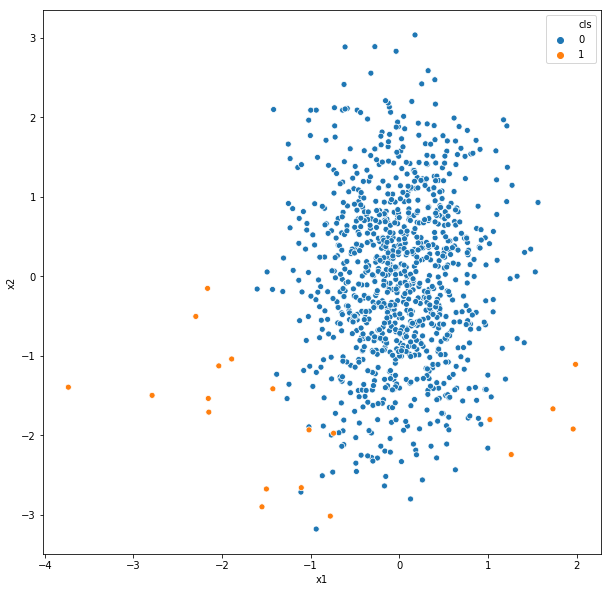

In [11]:
plt.figure(figsize=(10, 10))
sb.scatterplot(x = dataset.x1, y = dataset.x2, hue=dataset.cls)

### As we can see on the graph above, type 1 class is too little, so we need to rebalance.
### We apply over-sampling to scale class 1 to nearly class 2

In [12]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.
/home/dat-tran/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dat-tran/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dat-tran/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dat-tran/.local/lib/python3.6/site-packages/tensorflo

In [13]:
x = dataset[['x1', 'x2']]
y = dataset[['cls']]
smote = SMOTE()
x_s, y_s = smote.fit_resample(x, y)

/home/dat-tran/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
new_dataset = pd.DataFrame(x_s, columns=['x1', 'x2'])
new_dataset['cls'] = y_s

In [15]:
new_dataset.head()

,x1,x2,cls
0,0.200798,0.678038,0
1,0.016620,1.576558,0
2,0.228725,-0.559534,0
3,0.126379,-0.093814,0
4,0.600821,-0.298395,0


In [16]:
new_dataset.cls.value_counts()

1    980
0    980
Name: cls, dtype: int64

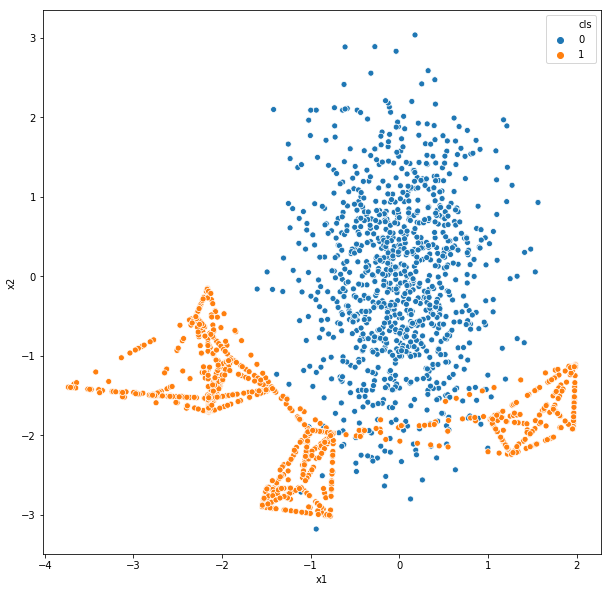

In [17]:
plt.figure(figsize=(10, 10))
sb.scatterplot(x = new_dataset.x1, y = new_dataset.x2, hue=new_dataset.cls)
plt.show()